In [2]:
!pip install pandas odfpy scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer


# Загрузка файла ODS
file_path = 'DataSet.ods'
data = pd.read_excel(file_path, engine='odf')

# фильтруем данные
filtered_data = data[(data['CWE-ID'] != 'NVD-CWE-Other') & (data['CVSS-V3'] != 'None') & (data['CVSS-V3'].notna())]

# Сохранение отфильтрованных данных в CSV файл
filtered_data.to_csv('filtered_data.csv', index=False)




In [3]:

#Берем данные из столбца DESCRIPTION
descriptions = filtered_data['DESCRIPTION'].astype(str)

# векторизиреум данные с помощью TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(descriptions)



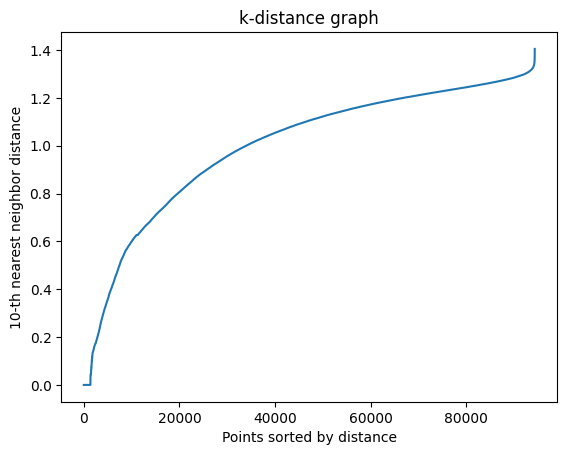

In [13]:
#подбираем наилучшее значение
from sklearn.neighbors import NearestNeighbors
import numpy as np

k = 10  # min_samples
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(tfidf_matrix)
distances, indices = nbrs.kneighbors(tfidf_matrix)

# Для каждого точки возьмем k-ое расстояние
distances = np.sort(distances[:, k-1], axis=0)
plt.plot(distances)
plt.title("k-distance graph")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{k}-th nearest neighbor distance")
plt.show()

In [14]:
# Применение DBSCAN для кластеризации
# Указываем параметры eps и min_samples (взяты подбором)
dbscan = DBSCAN(eps=1.3, min_samples=10, metric='euclidean')
clusters = dbscan.fit_predict(tfidf_matrix)



In [15]:
# Добавляем результаты кластеризации в DataFrame
filtered_data = filtered_data.copy()
filtered_data['cluster'] = clusters

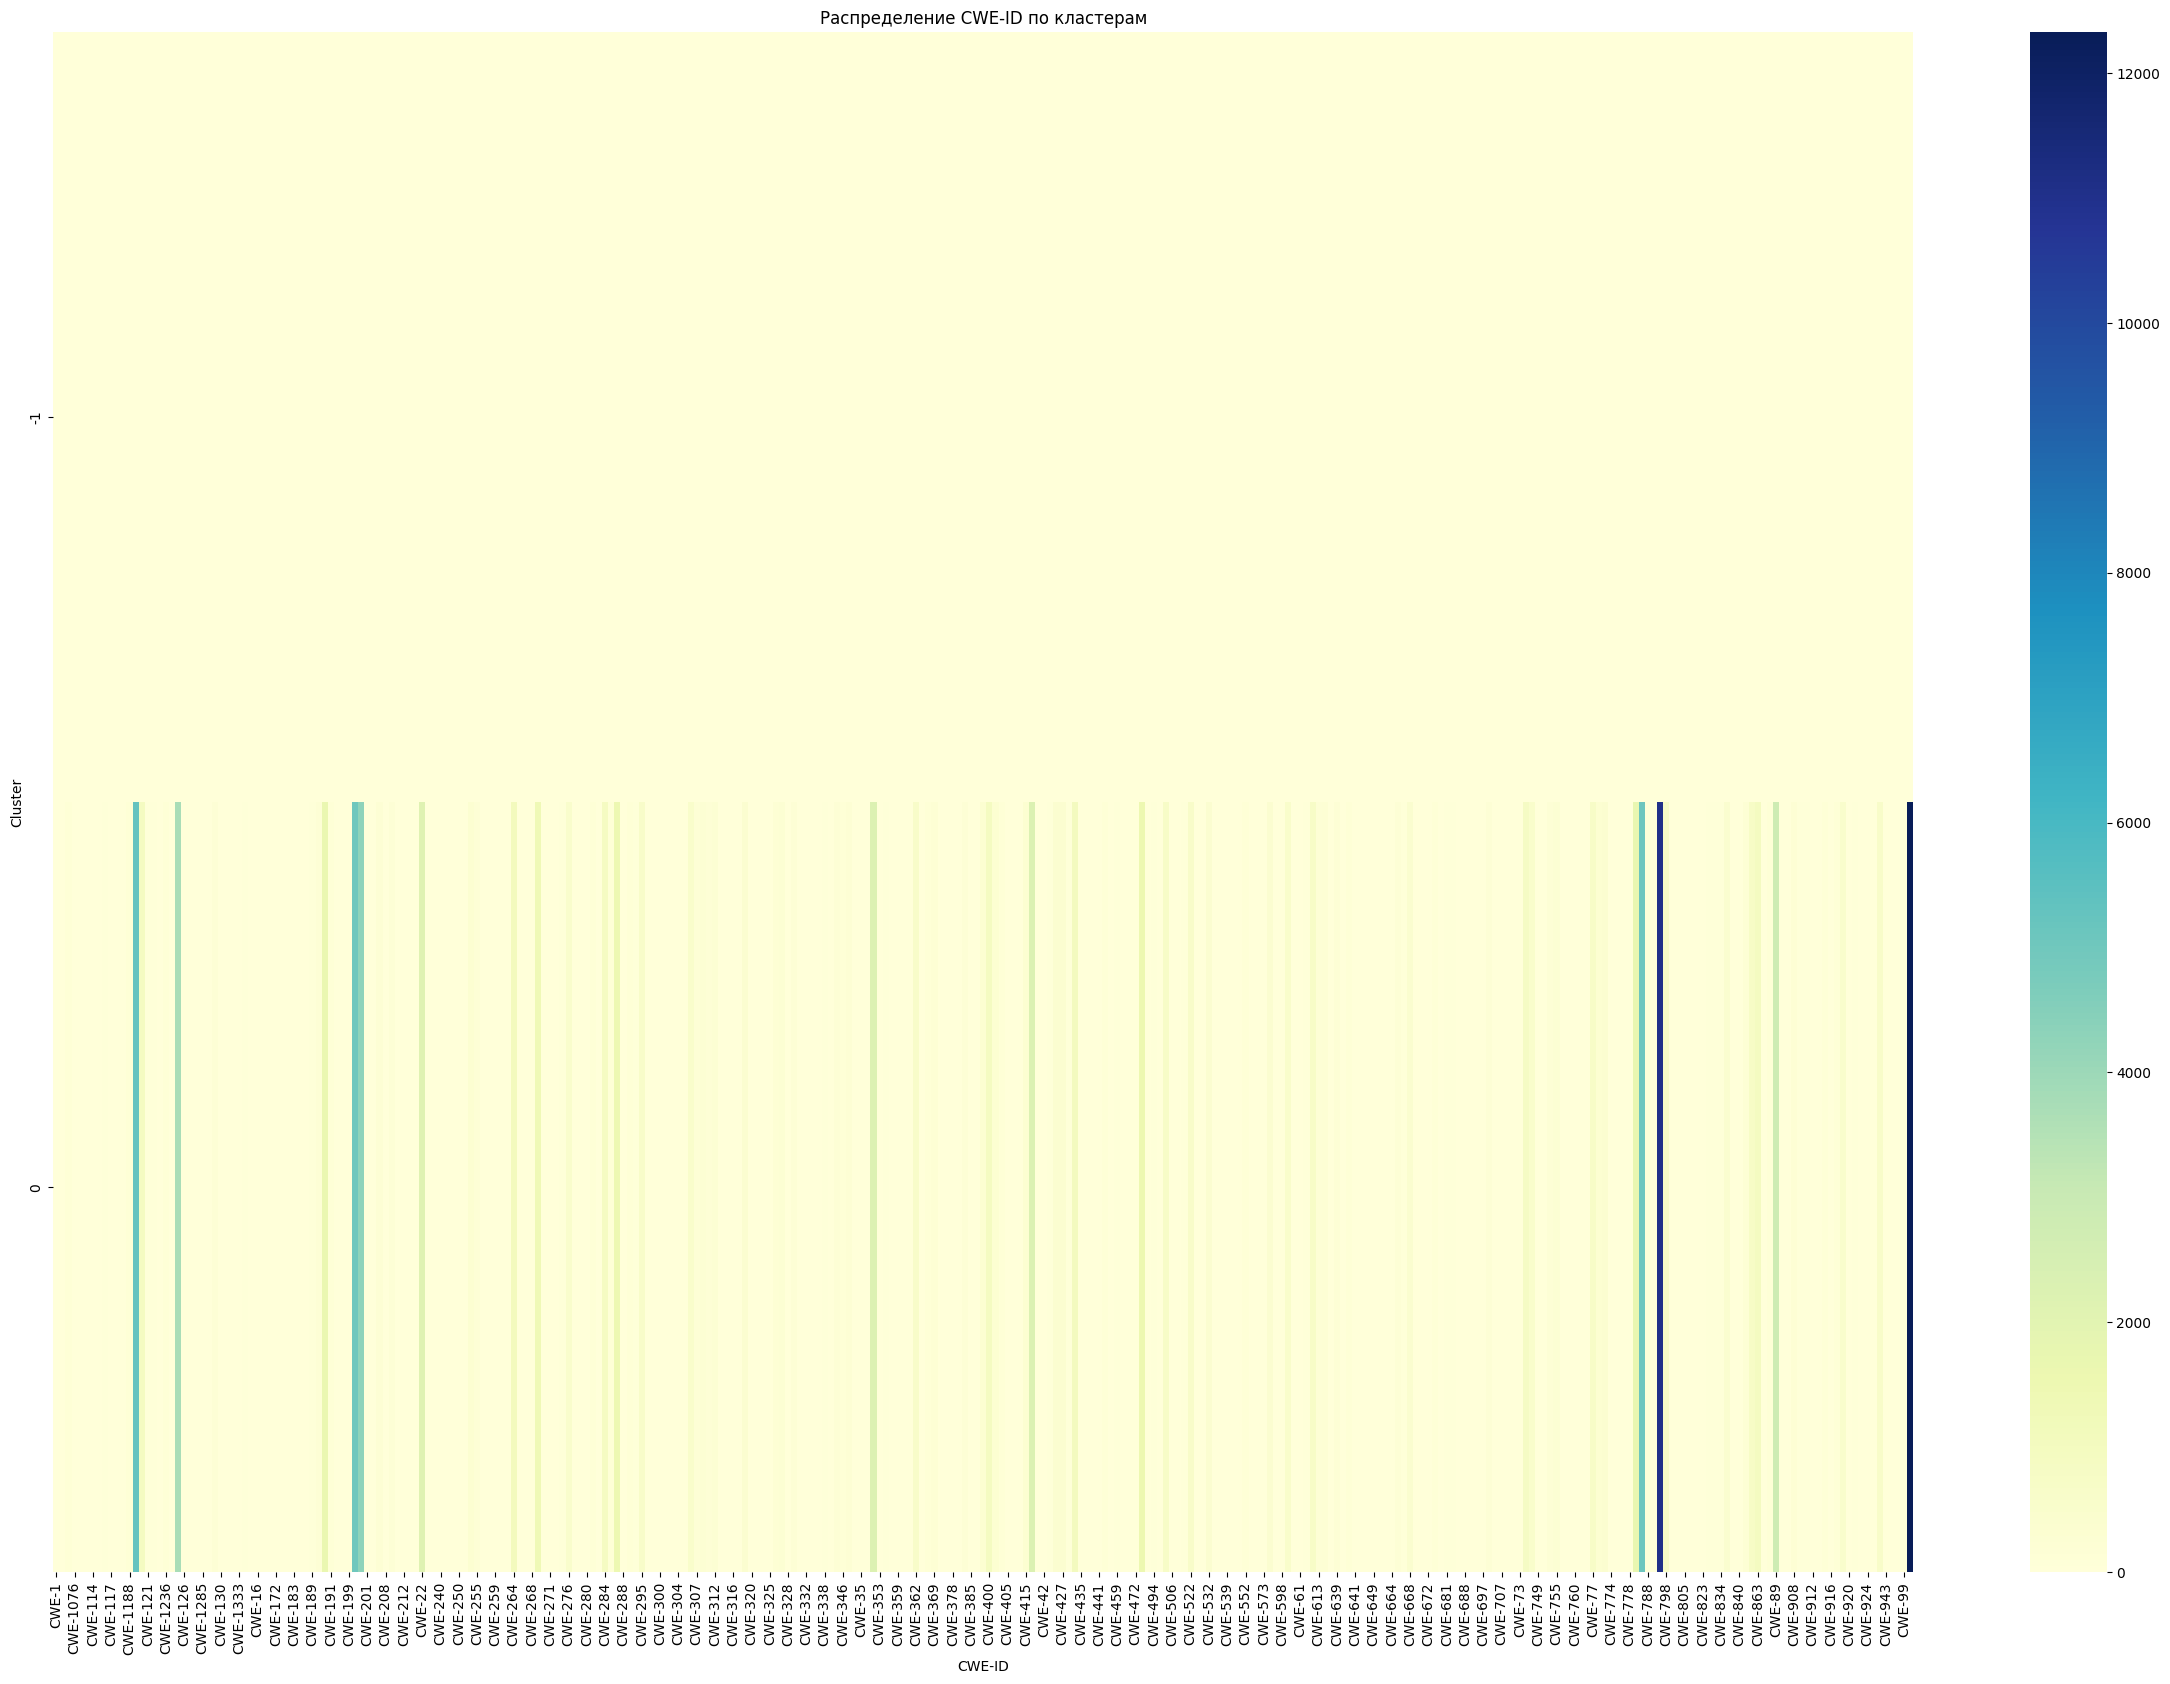

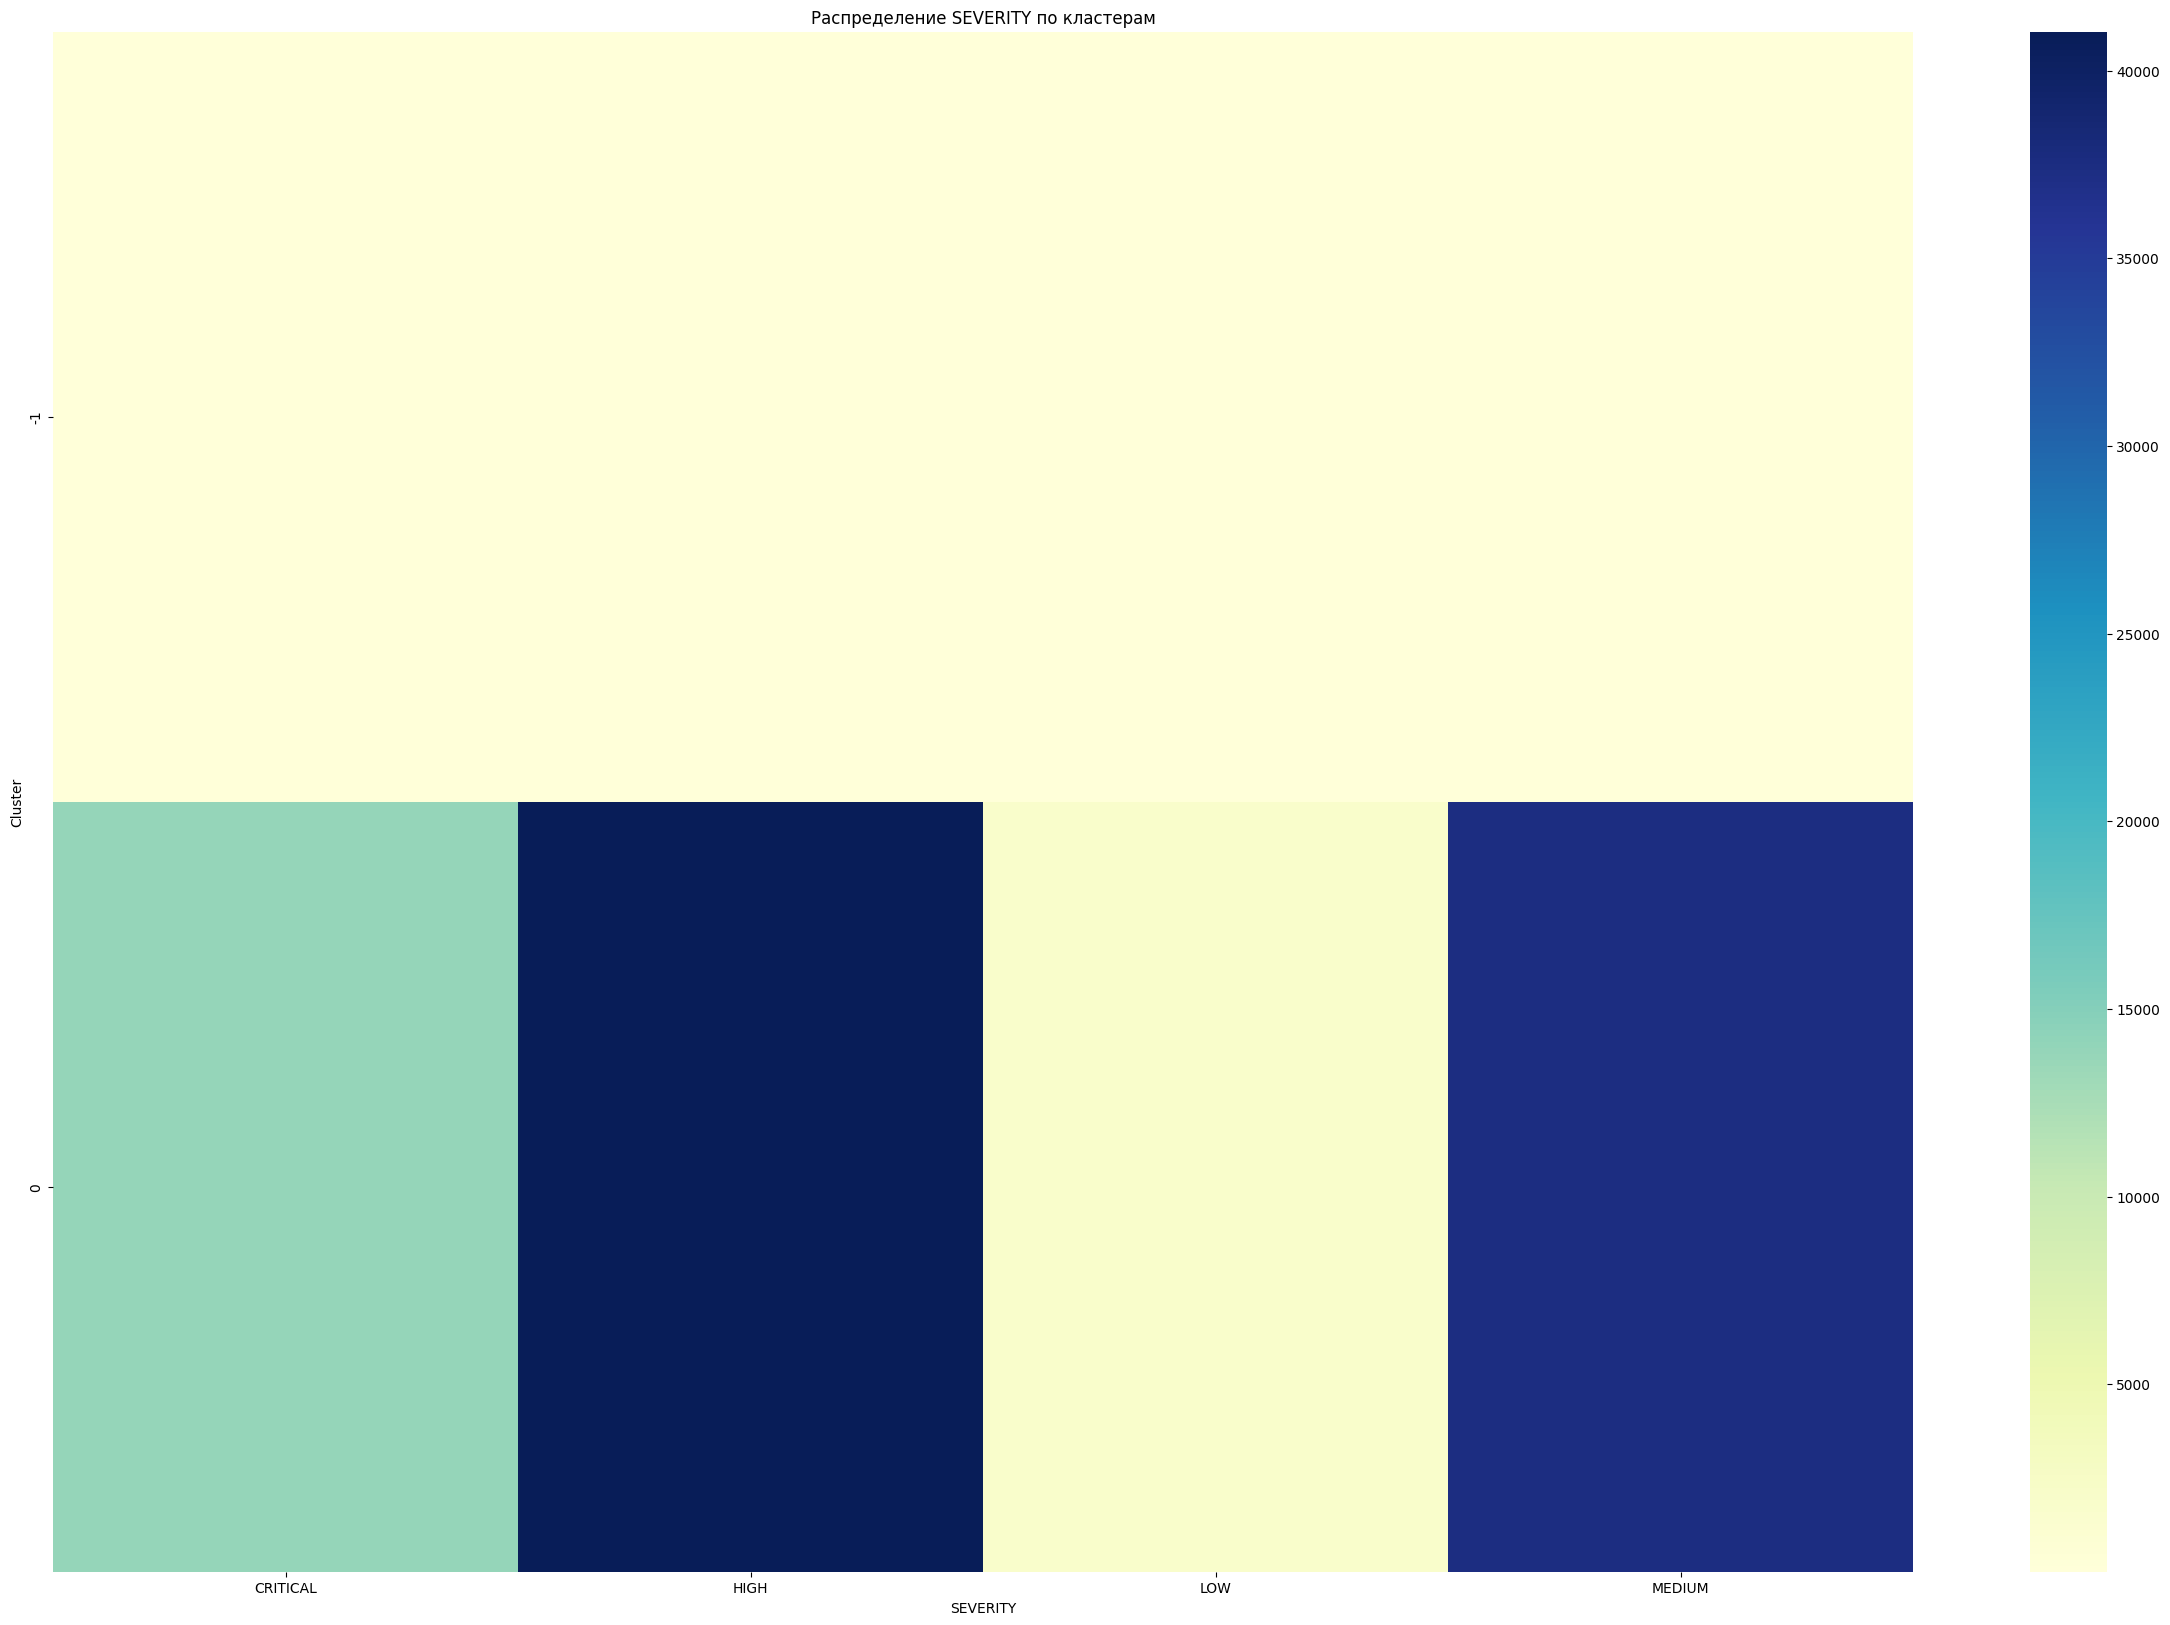

In [16]:
# Сводная таблица для анализа распределения CWE-ID по кластерам
cwe_counts = filtered_data.groupby(['cluster', 'CWE-ID']).size().unstack(fill_value=0)

# Сводная таблица для анализа распределения SEVERITY по кластерам
severity_counts = filtered_data.groupby(['cluster', 'SEVERITY']).size().unstack(fill_value=0)

# Визуализация распределения CWE-ID по кластерам
plt.figure(figsize=(30, 20))
sns.heatmap(cwe_counts, annot=False, fmt="d", cmap="YlGnBu")
plt.title("Распределение CWE-ID по кластерам")
plt.xlabel("CWE-ID")
plt.ylabel("Cluster")
plt.savefig('CWE_ID_eps_0_5_min_5.png', dpi=300)
plt.show()


# Визуализация распределения SEVERITY по кластерам
plt.figure(figsize=(30, 20))
sns.heatmap(severity_counts, annot=False, fmt="d", cmap="YlGnBu")
plt.title("Распределение SEVERITY по кластерам")
plt.xlabel("SEVERITY")
plt.ylabel("Cluster")
plt.savefig('SEVERITY_eps_0_5_min_5.png',dpi=300)
plt.show()

